# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/HP/Desktop/work_on_PG/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1. 분석의 목적과 변수 확인

In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [7]:
#수치형 변수에 대해서만 요약
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.corr()
# 상관성은 인과성이 아니다.?
# 상관성 : A가 증가하면 B가 증가하는 경향이 있다. 
# 인과성 : A로부터 B가 발생한다. (이런거 아냐!) 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
# 결측치 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### Survived?

In [13]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

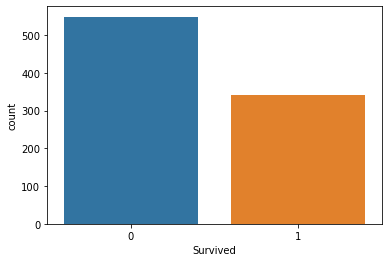

In [17]:
sns.countplot(x = 'Survived', data = df)

In [21]:
# class별 생존 비율
df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

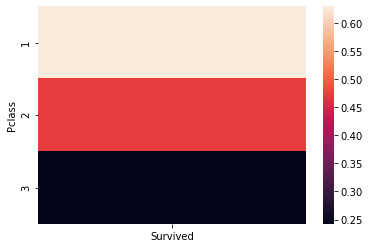

In [23]:
sns.heatmap(df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

### gender

In [25]:
df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

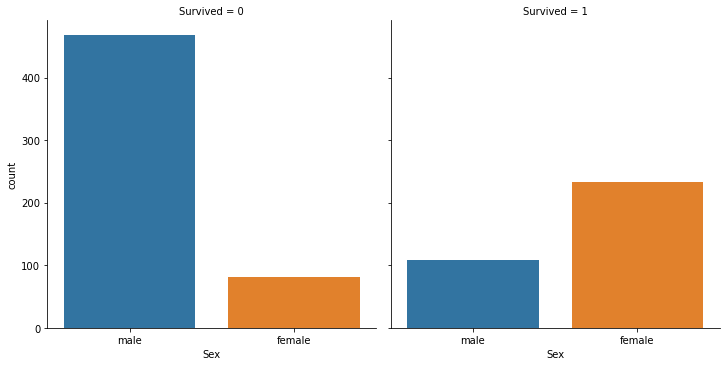

In [29]:
# column별로 x에 대해서 count 함수를 그리는 방법
sns.catplot(x = 'Sex', kind ='count', col = 'Survived', data = df)

### age

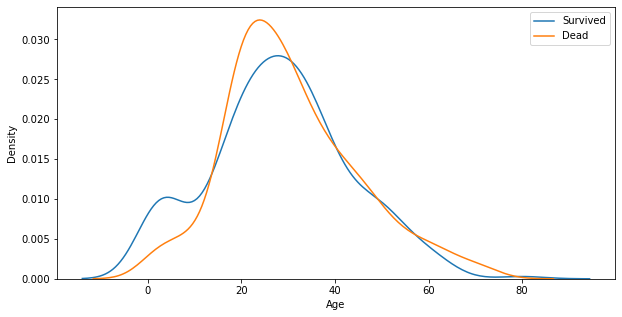

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
sns.kdeplot(x = df[df.Survived == 1]['Age'], ax = ax)
sns.kdeplot(x = df[df.Survived == 0]['Age'], ax = ax)
plt.legend(['Survived', 'Dead'])
plt.show()

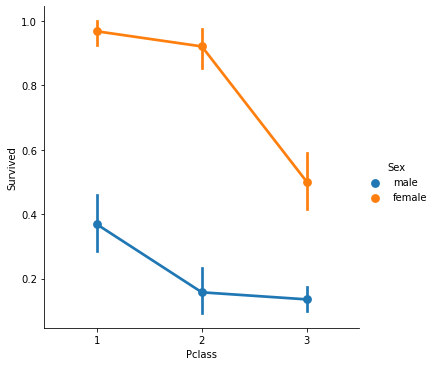

In [34]:
# 기타 예시 (여러 column에 대한 분석)

sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', kind = 'point', data = df)
plt.show()

[]

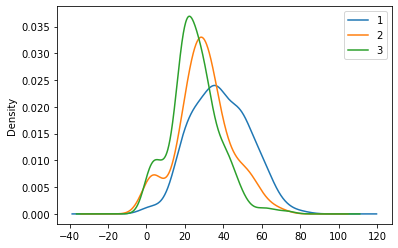

In [39]:
# age + pclass

df['Age'][df.Pclass == 1].plot(kind = 'kde')
df['Age'][df.Pclass == 2].plot(kind = 'kde')
df['Age'][df.Pclass == 3].plot(kind = 'kde')
plt.legend(['1', '2', '3'])
plt.plot()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

### Mission 1. 
Sibsp와 Parch 변수를 동시에 보려 한다. 그런데, 하나 고려되는 점은, SibSp던 Parch던 다 같은 가족이기에 둘 중 어떤 것의 우선순위를 두기 보다는 기본적으로 합쳐서 보는게 더 적당하다고 판단, Family라는 변수를 만들어 고려한다.

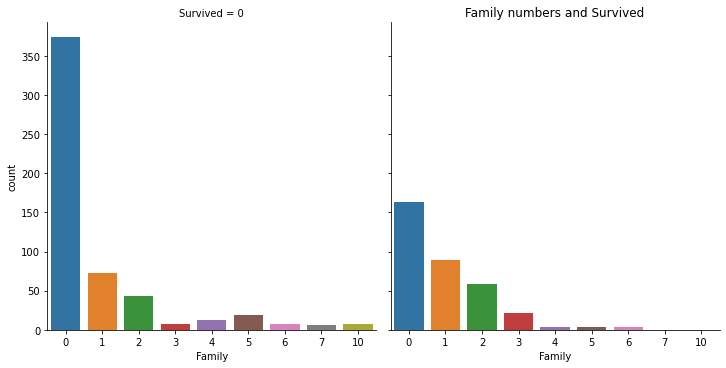

In [5]:
df['Family'] = df['SibSp'] + df['Parch']
sns.catplot(x = 'Family', kind ='count', col = 'Survived', data = df)
plt.title("Family numbers and Not survived")
plt.title("Family numbers and Survived")
plt.show()

그래프를 통해 확인해 본 결과, 같이 온 가족이 없거나 너무 많을수록, 생존률이 떨어진다고 추정할 수 있다.
실제 값을 비교해보면 다음과 같다.

In [6]:
df['Survived'].groupby(df['Family']).mean()

Family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

실제로, 가족이 1~3명 있을 경우가 생존률이 제일 높고 가족이 너무 많은 7명 이상인 경우에는 살아남은 사람이 없음을 알 수 있다.

### Mission 2. 사용한 dataset은 다음과 같다.  
https://www.kaggle.com/mylesoneill/world-university-rankings?select=timesData.csv  
세계 대학순위 관련 데이터이다.

In [20]:
univ = pd.read_csv("C:/Users/HP/Desktop/work_on_PG/timesData.csv")
univ

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


각 변수는 다음과 같다.
- world_rank = 순위
- university_name = 대학교 이름
- country = 소속 국가
- teaching = 수업의 질
- international = 국제화 다양성
- research = 연구능력
- income = 산학, 산업능력에 따른 연구소득
- citations = 연구 인용 결과
- total score = 최종점수
- num_students = 학생 수
- student_staff_ratio = 학생 대 교직원 비율
- international_students = 해왜학생 비율
- female_male_ratio = 남녀학생비율
- year = 2011~2016년도 평가결과 

다음 가설들을 확인해보고자 한다.
-  좋은 대학은 teaching을 잘할까?
-  좋은 대학은 international 점수가 좋을까?
-  좋은 대학은 student_staff_ratio값이 낮을까?

이번 분석에서는 우선, 2016년도 데이터만 사용한다.  
또한 2016년도 데이터 중 다음 것들만 사용한다.  
- world_rank
- university_name
- teaching
- international
- student_staff_ratio

#### 데이터 전처리 과정
우선은 2016년도 데이터만 가져와야 하고, 또 필요한 열만 추출해야 한다. 그 작업을 먼저 하자.

In [21]:
univ = univ.loc[univ['year']==2016,:]
univ

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46 : 54,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42 : 58,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,"18,812",11.8,34%,46 : 54,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,"11,074",9.0,33%,37 : 63,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


In [22]:
univ = univ[['world_rank', 'university_name', 'teaching', 'international', 'student_staff_ratio']]
univ

,world_rank,university_name,teaching,international,student_staff_ratio
1803,1,California Institute of Technology,95.6,64.0,6.9
1804,2,University of Oxford,86.5,94.4,11.6
1805,3,Stanford University,92.5,76.3,7.8
1806,4,University of Cambridge,88.2,91.5,11.8
1807,5,Massachusetts Institute of Technology,89.4,84.0,9.0
...,...,...,...,...,...
2598,601-800,Yeungnam University,18.6,24.3,15.3
2599,601-800,Yıldız Technical University,14.5,14.9,28.7
2600,601-800,Yokohama City University,24.0,16.1,3.7
2601,601-800,Yokohama National University,20.1,23.3,12.1


데이터 타입 및 결측치 정보를 확인해보자.

In [23]:
univ.isna().sum()

world_rank             0
university_name        0
teaching               0
international          0
student_staff_ratio    7
dtype: int64

In [24]:
univ.dtypes

world_rank              object
university_name         object
teaching               float64
international           object
student_staff_ratio    float64
dtype: object

??? income을 비교해야 하는데, object이다. 왜 object가 되었는지 내용을 확인해볼 필요가 있다.  
또한 rank또한 특정 등수는 묶여서 우위를 판단할 수 없다.  
실제로 원래 원본 데이터를 확인해보면 tail부분에서 601~800위는 total score란이 없다.  
따라서 income과 rank의 unique한 데이터들을 확인해봐야만 한다.

In [25]:
univ['world_rank'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '=39', '41', '42', '43', '=44', '46',
       '=47', '49', '50', '51', '52', '53', '54', '55', '=56', '58', '59',
       '=60', '62', '63', '64', '=65', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '=76', '78', '79', '80', '81', '=82', '84', '85',
       '86', '87', '=88', '=90', '93', '=94', '97', '98', '=99', '=101',
       '=104', '=106', '108', '109', '=110', '112', '=113', '116', '117',
       '118', '119', '=120', '=123', '=125', '=127', '129', '130', '=131',
       '=133', '135', '136', '137', '=138', '140', '141', '142', '143',
       '=144', '146', '147', '148', '=149', '153', '154', '155', '156',
       '157', '=158', '160', '=161', '163', '=164', '=167', '=172', '174',
       '175', '=176', '178', '179', '=180', '=182

In [26]:
univ['international'].unique()

array(['64.0', '94.4', '76.3', '91.5', '84.0', '77.2', '78.5', '96.0',
       '97.9', '65.0', '70.0', '64.3', '61.9', '73.5', '56.4', '49.5',
       '63.9', '77.8', '56.5', '53.7', '57.1', '93.6', '89.8', '53.9',
       '96.2', '93.8', '73.1', '62.8', '49.3', '98.6', '51.2', '87.1',
       '90.5', '68.6', '45.8', '85.5', '42.9', '61.5', '71.5', '49.2',
       '30.3', '58.4', '99.5', '31.7', '39.5', '70.3', '62.6', '33.0',
       '57.8', '93.3', '63.8', '94.6', '87.0', '84.4', '66.5', '80.5',
       '89.3', '44.9', '55.8', '39.0', '51.0', '35.3', '56.3', '82.4',
       '86.4', '76.1', '69.2', '87.6', '40.8', '85.8', '51.8', '58.2',
       '33.9', '90.3', '59.6', '83.3', '89.5', '60.3', '30.9', '92.3',
       '29.1', '26.1', '95.5', '74.1', '53.0', '87.3', '63.6', '52.7',
       '81.9', '93.5', '94.7', '92.8', '66.6', '38.3', '90.4', '76.8',
       '59.2', '64.6', '47.6', '92.6', '54.1', '88.4', '46.3', '84.2',
       '66.4', '33.7', '43.5', '54.2', '82.0', '83.7', '80.2', '33.3',
      

Rank의 경우는 동률도 있어서, 정리가 쉽지 않으나, 어느정도의 경향성 확인을 위해서는 집단간의 비교로만 충분하다.
따라서 대학의 순위를 다음과 같이 나누려고 한다.
- 1위 ~ 200위 : A
- 201위 ~ 400위 :B
- 401위 ~ 600위 : C
- 601위 ~ 800위 : D
데이터를 잘 살펴보면, 이미 순위대로 나열되어 있으므로 행 순서대로 나눠주면 될 것이다.

In [27]:
# 계산을 쉽게 하기 위해 index를 초기화 후에 하자.
univ.reset_index(drop=True, inplace=True)

In [28]:
univ['rank'] = ['x'] * 800
for i in range(0, 800):
    if i < 200:
        univ.iloc[i,5] = 'A'
    elif i < 400:
        univ.iloc[i,5] = 'B'
    elif i < 600:
        univ.iloc[i,5] = 'C'
    else:
        univ.iloc[i,5] = 'D'

<ipython-input-28-9391c75e275b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ['rank'] = ['x'] * 800
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [29]:
univ

,world_rank,university_name,teaching,international,student_staff_ratio,rank
0,1,California Institute of Technology,95.6,64.0,6.9,A
1,2,University of Oxford,86.5,94.4,11.6,A
2,3,Stanford University,92.5,76.3,7.8,A
3,4,University of Cambridge,88.2,91.5,11.8,A
4,5,Massachusetts Institute of Technology,89.4,84.0,9.0,A
...,...,...,...,...,...,...
795,601-800,Yeungnam University,18.6,24.3,15.3,D
796,601-800,Yıldız Technical University,14.5,14.9,28.7,D
797,601-800,Yokohama City University,24.0,16.1,3.7,D
798,601-800,Yokohama National University,20.1,23.3,12.1,D


In [30]:
univ.drop(['world_rank'], axis = 1, inplace = True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
univ

,university_name,teaching,international,student_staff_ratio,rank
0,California Institute of Technology,95.6,64.0,6.9,A
1,University of Oxford,86.5,94.4,11.6,A
2,Stanford University,92.5,76.3,7.8,A
3,University of Cambridge,88.2,91.5,11.8,A
4,Massachusetts Institute of Technology,89.4,84.0,9.0,A
...,...,...,...,...,...
795,Yeungnam University,18.6,24.3,15.3,D
796,Yıldız Technical University,14.5,14.9,28.7,D
797,Yokohama City University,24.0,16.1,3.7,D
798,Yokohama National University,20.1,23.3,12.1,D


이제 결측치 처리를 하려고 한다. income의 경우는 데이터 타입 변동을 시키자. 모두 실수값으로 변경한 후에  
student_staff_ration열의 결측치를 평균으로 대체처리하려고 한다. (800개중 많아야 7개라 무방하다)

In [33]:
univ['international'] = univ['international'].astype(float)

<ipython-input-33-51344018f2bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ['international'] = univ['international'].astype(float)


In [35]:
univ['student_staff_ratio'] = univ['student_staff_ratio'].fillna(univ['student_staff_ratio'].mean())

<ipython-input-35-95c1c74fc6cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ['student_staff_ratio'] = univ['student_staff_ratio'].fillna(univ['student_staff_ratio'].mean())


In [37]:
univ.isna().sum()

university_name        0
teaching               0
international          0
student_staff_ratio    0
rank                   0
dtype: int64

결측치 처리가 잘되었음을 알 수 있다. 이제 시각화를 실시하자  

#### univ rank와 teaching의 비교
기대하는 것은 등수가 높은대학일 수록, teaching이 뛰어날 것이다. 상식(?)이 맞는지 확인해보자.

In [41]:
result_1 = univ['teaching'].groupby(by = univ['rank']).mean()
result_1

rank
A    50.2500
B    30.2490
C    24.8645
D    20.9725
Name: teaching, dtype: float64

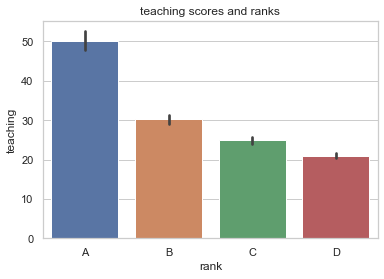

In [43]:
# seaborn의 barplot에서는 자동으로 mean값으로 표현해준다.
# 추가적 전처리가 필요하지 않다.
sns.set_theme(style = 'whitegrid')
sns.barplot(x='rank', y='teaching', data = univ)
plt.title('teaching scores and ranks')
plt.show()

실제 점수와 그래프를 통해 알 수 있듯이, A등급으로 분류한 상위 200개의 대학의 강의점수 평균이 다른 등급대비 매우 높음을 알 수 있다.

#### univ ranking과 international의 비교
당연히 유학생들은 좋은 학교에 가고싶어할 것이므로, 유학생 비중이 일반적으로는 고등급일수록 높을 것 같다.
또한 그런 대학일수록, 국제화에 신경을 쓸 것이라고 예측이 가능하기에 고등급의 점수가 높을것이라고 볼수있다.

In [45]:
result_2 = univ['international'].groupby(by = univ['rank']).mean()
result_2

rank
A    66.7890
B    52.8705
C    42.9960
D    31.3460
Name: international, dtype: float64

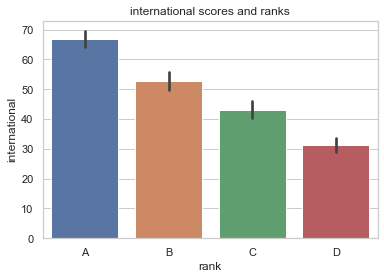

In [46]:
sns.set_theme(style = 'whitegrid')
sns.barplot(x='rank', y='international', data = univ)
plt.title('international scores and ranks')
plt.show()

이 또한, 예상대로 높은 등급일수록 국제화점수가 높다.

#### univ rank와 student_staff_ratio의 비교

이는 어떨까? 대충 예상으로는 높은 등급의 대학은 교육의 질이 좋으니, 더 많은 교직원이 있을 것만 같다. 정말 그럴까?

In [47]:
result_3 = univ['student_staff_ratio'].groupby(by = univ['rank']).mean()
result_3

rank
A    17.226664
B    21.440246
C    18.822082
D    18.976582
Name: student_staff_ratio, dtype: float64

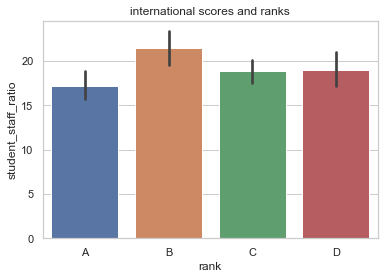

In [48]:
sns.set_theme(style = 'whitegrid')
sns.barplot(x='rank', y='student_staff_ratio', data = univ)
plt.title('international scores and ranks')
plt.show()

#### Additional. 진짜 저렇다고 말할 수 있는지 통계적으로 확인해보려하기

어라? 예상외로 크게 차이가 있지 않다. 정말 통계적으로 차이가 없는지 확인하고 싶다.
네개의 집단간의 차이가 유의미하지 않다는 것을 확인하기 위해서는, 분산분석을 사용해야 한다.

여기서 우리가 확인해봐야 하는 기본가정은
- 집단간은 당연히 독립적이므로 상관 없음
- 등분산성을 만족하는가?
- 각 집단별로 해당 점수분포가 정규분포를 만족하고있는가?

이를 만족할때에만 분산분석으로 정말 그런지 확인할 수 있다.

In [49]:
result_3 = univ['student_staff_ratio'].groupby(by = univ['rank']).std()
result_3

rank
A    11.461365
B    13.816742
C     9.071423
D    14.504185
Name: student_staff_ratio, dtype: float64

In [52]:
a_ssr = univ.loc[univ['rank']=='A',['student_staff_ratio']]
b_ssr = univ.loc[univ['rank']=='B',['student_staff_ratio']]
c_ssr = univ.loc[univ['rank']=='C',['student_staff_ratio']]
d_ssr = univ.loc[univ['rank']=='D',['student_staff_ratio']]

In [57]:
# 표본수가 2000 이하로, Shapiro Test를 사용한다.
# 유의수준은 5%로 검정, 데이터셋이 정규성을 띄기 위헤서는 귀무가설을 기각해서는 안된다.
# 즉 p-val 값이 0.05 미만일 경우, 정규성을 띈다고 볼 수 없다.
from scipy import stats
print("A : ", stats.shapiro(a_ssr))
print("B : ", stats.shapiro(b_ssr))
print("C : ", stats.shapiro(c_ssr))
print("D : ", stats.shapiro(d_ssr))

A :  ShapiroResult(statistic=0.7755528092384338, pvalue=3.2792652912845663e-16)
B :  ShapiroResult(statistic=0.838691234588623, pvalue=1.2542485767434025e-13)
C :  ShapiroResult(statistic=0.8613854646682739, pvalue=1.5893547328921231e-12)
D :  ShapiroResult(statistic=0.5344290733337402, pvalue=8.589492402748538e-23)


네 집단 모두 정규성을 만족하지 않아, **통계적 방법으로 분석하기는 어렵다** 고 볼 수 있다.

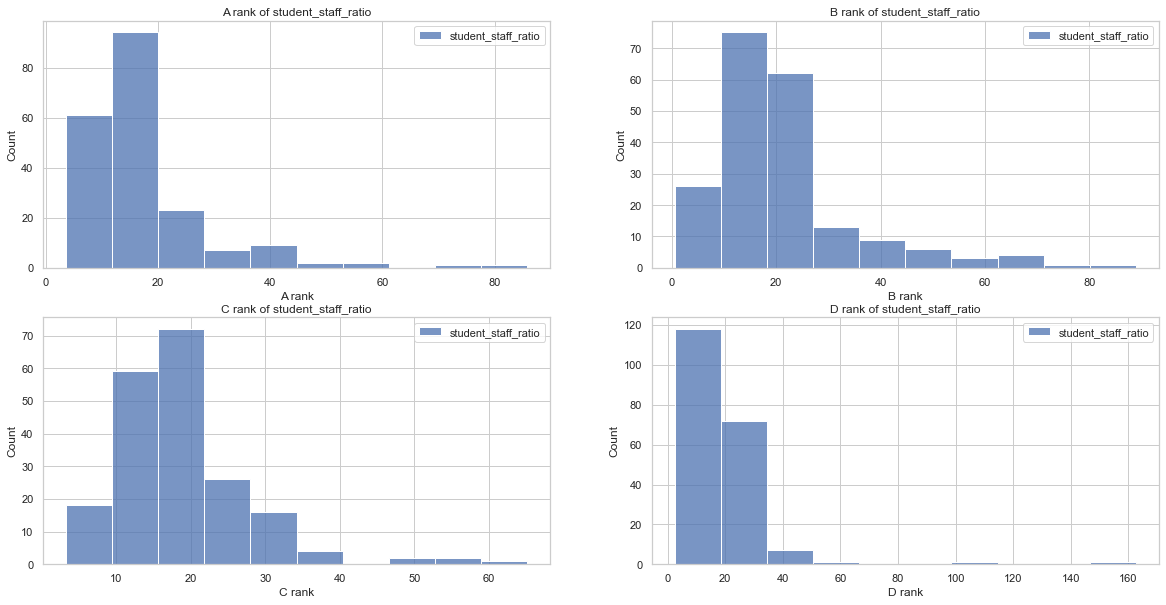

In [60]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.histplot(data = a_ssr, bins = 10)
plt.title("A rank of student_staff_ratio")
plt.xlabel("A rank")

plt.subplot(222)
sns.histplot(data = b_ssr, bins = 10)
plt.title("B rank of student_staff_ratio")
plt.xlabel("B rank")

plt.subplot(223)
sns.histplot(data = c_ssr, bins = 10)
plt.title("C rank of student_staff_ratio")
plt.xlabel("C rank")

plt.subplot(224)
sns.histplot(data = d_ssr, bins = 10)
plt.title("D rank of student_staff_ratio")
plt.xlabel("D rank")

plt.show()

실제로 각 집단별로, 확인해 본 결과, 정규분포를 근사하게라도 띄고 있는 집단이 없어 분산분석을 사용해도 올바른 결과를 얻어내긴 어려울 것이다.